In [62]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob, os

In [5]:
# get file with visit start times

direc = './dataFolders/Output/Step5_v3/'
files = glob.glob(direc + '*RawData*.csv')

In [45]:
n = []
isi = []

for f in files:
    df = pd.read_csv(f)
    a, b, c, _ = os.path.basename(f).split('_')
    name = a +'_'+ b + '_' + c
    ISI = df.In_Frame[1:].values - df.In_Frame[0:-1].values
    
    n.append(name)
    isi.append(ISI)

In [49]:
results = pd.DataFrame({'name': n, 
                       'interVisitInterval': isi})
new= results["name"].str.split("_", n = 1, expand = True)
results['lightLevel']=new[0]

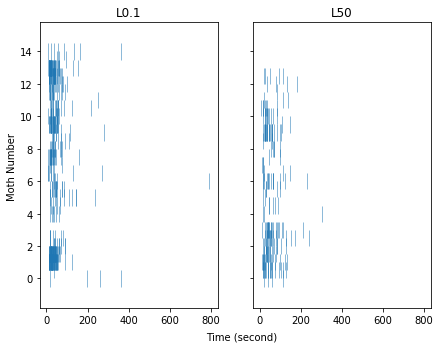

In [58]:
f, ax = plt.subplots(1,2,
                     sharex = True, sharey = True,
                    figsize = (7,7/4*3))
ax = ax.ravel()
i = 0
for lightlevel, subdf in results.groupby('lightLevel'):
    ax[i].eventplot(positions = subdf.interVisitInterval.values*1/100,
                      orientation = 'horizontal'
                     , linelengths = 1
                     , lineoffsets = 0.5
                         , linewidth = 0.5)
    ax[i].set_title(lightlevel)
    i+=1

#     ticklocs = np.arange(len(subdf))
#     plt.yticks(locs =  ticklocs
#                ,labels = subdf.name)

f.text(0.525, 0.04, 'Time (second)', ha='center')
f.text(0.06, 0.5, 'Moth Number', va='center', rotation='vertical')
plt.savefig(r"./dataFolders/Output/Proboscis/Plots/" + 'InterVisitInterval.png')

# plot them as distributions

L0.1
L50


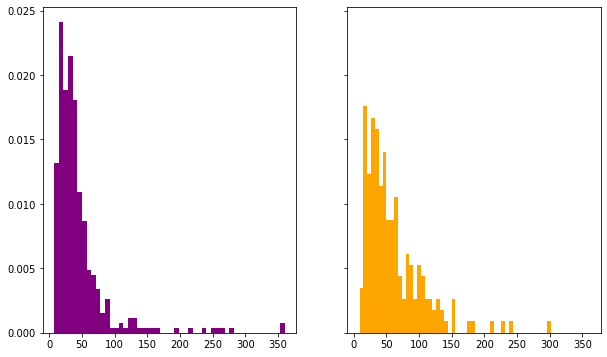

In [76]:
f, ax = plt.subplots(1,2, figsize = (10,6), sharex = True, sharey = True)
color = ['purple', 'orange']
i =0
for lightlevel, subdf in results.groupby('lightLevel'):
    print(lightlevel)
    flower_visit_intervals = subdf.interVisitInterval.values*1/100  
    
    all_interVisit = np.concatenate(flower_visit_intervals)
    ax[i].hist(all_interVisit[all_interVisit<400], bins = 50, color = color[i], density = True)
    i+=1
    
plt.savefig('./dataFolders/Output/Proboscis/Plots/InterVisitInterval-histogram.png')